# Web scraping & EDA

Parsing profiles of candidates who are looking for a job as an analyst from djinny.co and conducting EDA analysis

In [141]:
#import libraries

import pandas as pd
import requests
from bs4 import BeautifulSoup
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

### Scrapping Data from djinni site

In [146]:
data = []

# getting numbers of pages

url = 'https://djinni.co/developers/?title=Data%20Analyst'
r = requests.get(url)
pages = int(BeautifulSoup(r.text, 'lxml').find_all('a',class_='page-link')[-2].text)

for p in range(1, pages):
    
    #getting names & urls canditades
    
    url = f'https://djinni.co/developers/?title=Data+Analyst&page={p}'
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'lxml')
    sleep(3)
    
    headers = soup.find_all('div', class_='candidate-header')
    
    for header in headers:
        
        #getting information of canditad
        
        name = header.find('a', class_="profile").text.strip()
        url = 'https://djinni.co'+header.find('a', class_="profile").get('href')
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'lxml')
        
        country = [i.strip() for i in soup.find('div',class_='main-profile-details').text.split('·')][0]
        en_level = list(filter(None, [i.strip() for i in soup.find('p',class_='before-hint').text.strip().split('\n')]))[-2]

        salary = soup.find('div',class_='main-profile-details').find('span', 'profile-details-salary').text
        experiense = soup.find('p',class_='before-hint').text.split('·')[0].strip().split('\n')[0]
        try:
            skills = soup.find_all('p',class_='profile')[1].text
        except:
            skills = '-'
        
        #collecting data in list
        
        data.append([name, url, country, en_level, salary, experiense, skills])

In [261]:
columns = ['name', 'url', 'country', 'en_level', 'salary', 'experience', 'skills']

### Convert Data into DataFrame

In [262]:
df = pd.DataFrame(data, columns=columns)
df.head()

,name,url,country,en_level,salary,experience,skills
0,Data Analyst,https://djinni.co/q/b50d86eb60/,Казахстан,Англійська Advanced/Fluent,$2400,7 років досвіду,"SQL, Excel, Python, analytical skills, English..."
1,Data Analyst,https://djinni.co/q/29cd59c54b/,Україна,Англійська Advanced/Fluent,$800,6 місяців,"English, Tableau, SQL"
2,Data Analyst,https://djinni.co/q/b1cfc59a3d/,Азербайджан,Англійська Upper-Intermediate,$1600,6 років досвіду,"Excel, analytical skills, Data Visualisation, ..."
3,"Data Analyst, Data Engineer, Data Scientist, A...",https://djinni.co/q/242e7f9b3f/,Україна,Англійська Advanced/Fluent,$2000,3 роки досвіду,"Qlik Sense, Data Analyst, SQL, Data Visualisat..."
4,Data Analyst / Data Scientist,https://djinni.co/q/2f27fca811/,Україна,Англійська Pre-Intermediate,$3000,8 років досвіду,"Python, Machine Learning, Data Science, SQL, n..."


### Cleaning and preparing Data

In [263]:
df['en_level'] = df.en_level.str.replace('Англійська', '')
df['salary'] = df.salary.str.replace('$', '')
df['salary'] = df.salary.astype('int')

<ipython-input-263-119572279966>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['salary'] = df.salary.str.replace('$', '')


In [264]:
df['skills_count'] = df.skills.apply(lambda x: len(x.split(',')))

In [265]:
#function to convert experience in numbers

def experience(experience):
    
    exp_dict = {'7 років досвіду': 7, 
                '8 років досвіду': 8, 
                '1 рік досвіду': 1,
               '2 роки досвіду': 2,
               '3 роки досвіду': 3,
               'Без досвіду': 0,
               '5 років досвіду': 5,
               '4 роки досвіду': 4,
               '6 місяців': 0.5,
               '1.5 роки досвіду': 1.5,
               '2.5 роки досвіду': 2.5,
               'Більше 10 років досвіду': 11,
               '6 років досвіду': 6,
               '10 років досвіду': 10,
               '10 років досвіду': 10}
    
    if experience in exp_dict:
        return exp_dict.get(experience)

In [266]:
df['experience'] = df.experience.apply(experience)

### Check Data

I live in Ukraine, so i interesting in candidates, who set same location.

In [240]:
df.country.value_counts()

Україна                       267
Азербайджан                    83
Нігерія                        17
Казахстан                      12
Польща                          7
Грузія                          6
Естонія                         4
Киргизстан                      4
Німеччина                       3
Ефіопія                         3
Велика Британія                 3
Канада                          2
Сполучені Штати                 2
Австрія                         1
Данія                           1
Афганістан                      1
Єгипет                          1
Італія                          1
Кіпр                            1
Таїланд                         1
Португалія                      1
Таджикистан                     1
Ліван                           1
Узбекистан                      1
Франція                         1
Сербія                          1
Обʼєднані Арабські Емірати      1
Фінляндія                       1
Іспанія                         1
Name: country,

In [267]:
df_ua = df.query('country == "Україна"')

In [268]:
df_ua.head()

,name,url,country,en_level,salary,experience,skills,skills_count
1,Data Analyst,https://djinni.co/q/29cd59c54b/,Україна,Advanced/Fluent,800,0.5,"English, Tableau, SQL",3
3,"Data Analyst, Data Engineer, Data Scientist, A...",https://djinni.co/q/242e7f9b3f/,Україна,Advanced/Fluent,2000,3.0,"Qlik Sense, Data Analyst, SQL, Data Visualisat...",15
4,Data Analyst / Data Scientist,https://djinni.co/q/2f27fca811/,Україна,Pre-Intermediate,3000,8.0,"Python, Machine Learning, Data Science, SQL, n...",25
6,Data Analyst,https://djinni.co/q/1660c73abe/,Україна,Upper-Intermediate,1000,2.0,"JavaScript, HTML, CSS, SQL, analytical skills,...",11
7,Data Analyst,https://djinni.co/q/2aaf562b15/,Україна,Upper-Intermediate,800,0.0,"SQL, Python, Excel, analytical skills, English...",9


In [269]:
df_ua.shape

(268, 8)

In [270]:
df_ua.drop_duplicates(inplace=True)

<ipython-input-270-a60ed8283751>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ua.drop_duplicates(inplace=True)


In [271]:
df_ua.isna().sum().sort_values(ascending=False)

experience      2
name            0
url             0
country         0
en_level        0
salary          0
skills          0
skills_count    0
dtype: int64

In [272]:
df_ua.describe()

,salary,experience,skills_count
count,267.000000,265.000000,267.000000
mean,1782.958801,3.186792,13.161049
std,1157.778471,2.900499,6.949354
min,300.000000,0.000000,1.000000
25%,1000.000000,1.000000,8.000000
50%,1500.000000,2.500000,11.000000
75%,2500.000000,5.000000,17.000000
max,8000.000000,11.000000,41.000000


In [273]:
df_ua.describe(include='object')

,name,url,country,en_level,skills
count,267,267,267,267,267
unique,126,267,1,6,267
top,Data Analyst,https://djinni.co/q/aa118fe7a4/,Україна,Intermediate,"Vero, Amplitude, Wordstat, DataStudio, Jira, C..."
freq,110,1,267,105,1


## Univariate Variable Analysis

Categorical Variable: name, url, country, en_level, experience

Numerical Variable: salary, skills_count

### Categorical Variable

<AxesSubplot:xlabel='en_level', ylabel='count'>

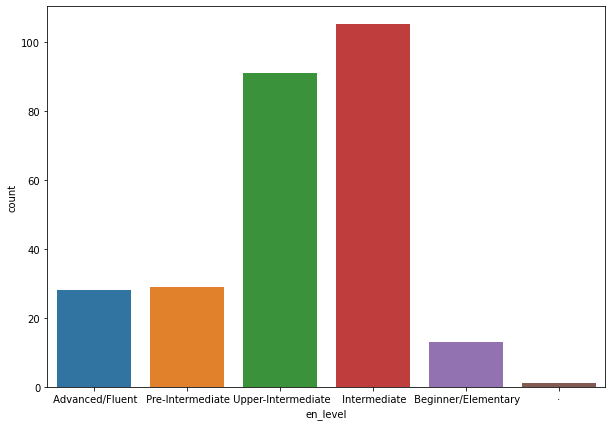

In [284]:
plt.figure(figsize=(10,7))
sns.countplot(x = df_ua.en_level)

<AxesSubplot:xlabel='experience', ylabel='count'>

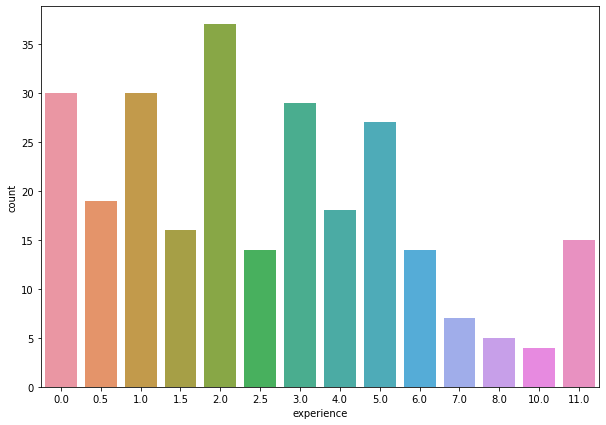

In [287]:
plt.figure(figsize=(10,7))
sns.countplot(x = df_ua.experience)

### Numerical Variable

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

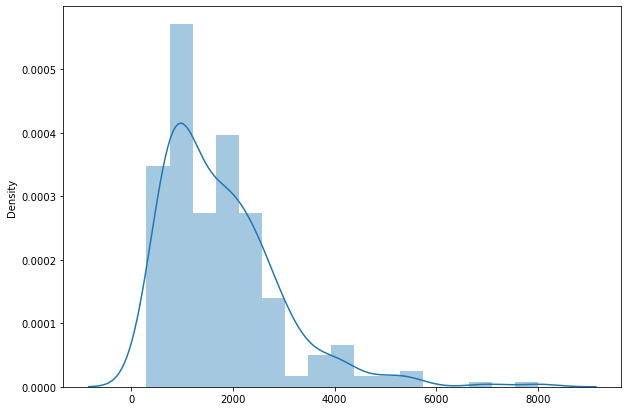

In [289]:
plt.figure(figsize=(10,7))
sns.distplot(x = df_ua.salary)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

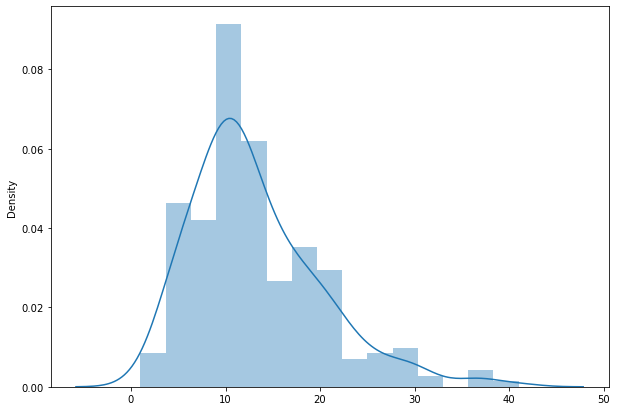

In [290]:
plt.figure(figsize=(10,7))
sns.distplot(x = df_ua.skills_count)

+ Most candidates have intermediate and upper-intermediate english.
+ Avg. experience is 3 years.
+ Avg. skills_count is 13.
+ Avg. salary about 1800$

## Visualization

### Correlation Between salary -- experience -- skills_count 

<AxesSubplot:>

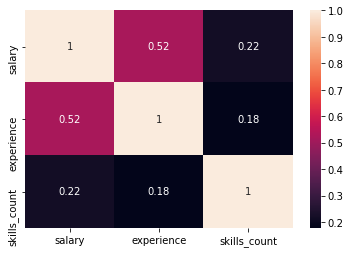

In [292]:
sns.heatmap(df_ua.corr(), annot=True)

Experience has correlation with salary (0.52)

### How salary relatives to english_level

<AxesSubplot:xlabel='en_level', ylabel='salary'>

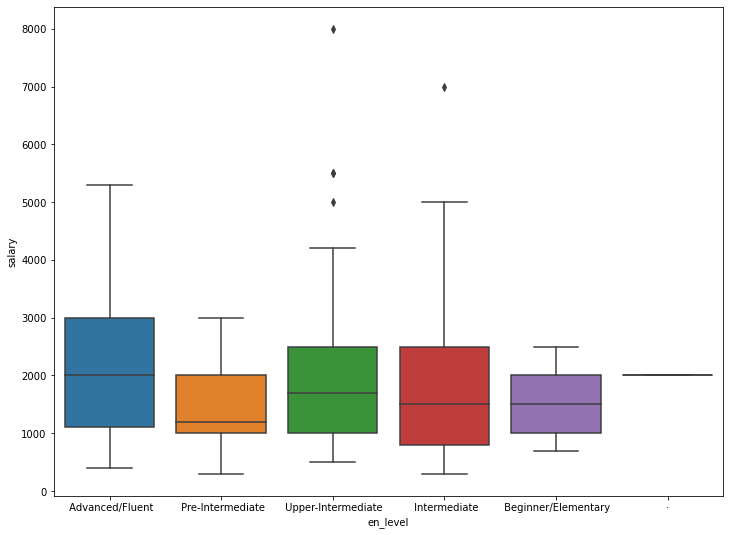

In [293]:
plt.figure(figsize=(12,9))
sns.boxplot(x = df_ua.en_level, y=df_ua.salary)

The higher the level of English a candidate has, the higher his salary

### How salary relatives to experience

<AxesSubplot:xlabel='experience', ylabel='salary'>

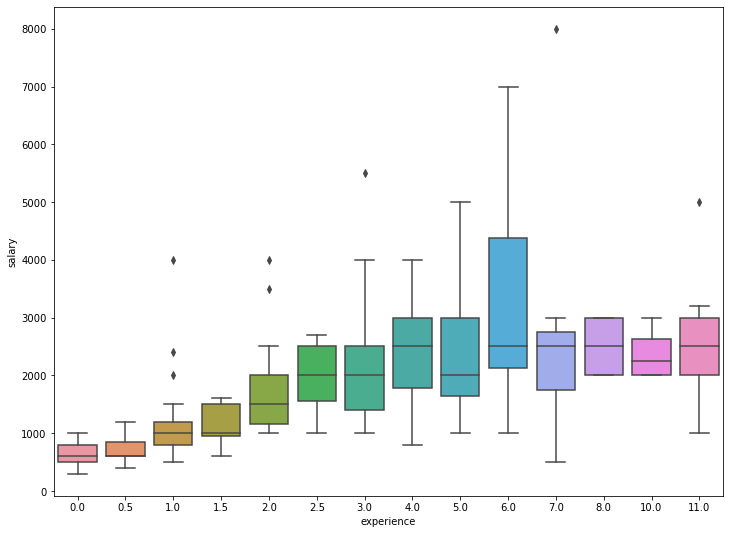

In [294]:
plt.figure(figsize=(12,9))
sns.boxplot(x=df_ua.experience, y=df_ua.salary)


In [296]:
df_ua.groupby('experience').salary.median()

experience
0.0      600
0.5      600
1.0     1000
1.5     1000
2.0     1500
2.5     2000
3.0     2000
4.0     2500
5.0     2000
6.0     2500
7.0     2500
8.0     2500
10.0    2250
11.0    2500
Name: salary, dtype: int64

The higher the experience, the higher the salary. The trend is observed up to 6 years of experience, then it is fixed at the level of about $ 2,500

<AxesSubplot:xlabel='en_level', ylabel='experience'>

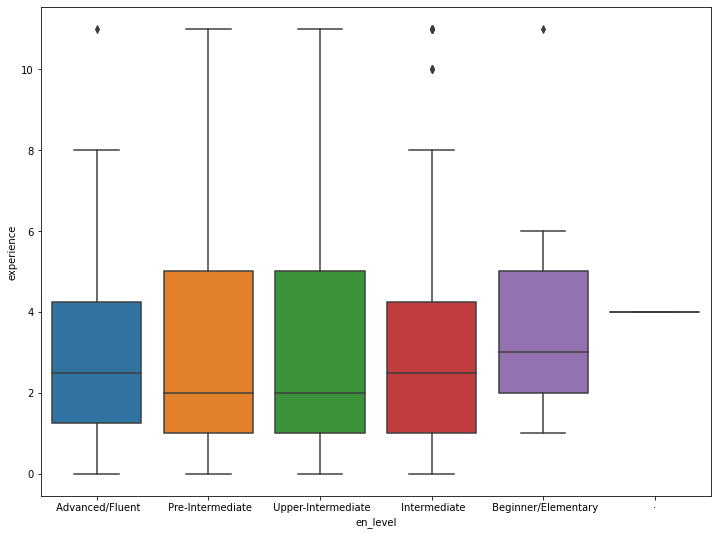

In [299]:
plt.figure(figsize=(12,9))
sns.boxplot(x=df_ua.en_level, y=df_ua.experience)

### What skills are important for data analyst?

In [336]:
skills = df_ua[['name', 'skills']]

In [337]:
skills['skills'] = skills.skills.str.split(',')

<ipython-input-337-33571ea36ad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skills['skills'] = skills.skills.str.split(',')


In [348]:
#unpack lists
skills = skills.explode('skills')
skills['skills'] = skills.skills.str.strip()

In [339]:
da_skills = skills.query('name == "Data Analyst"')

<AxesSubplot:>

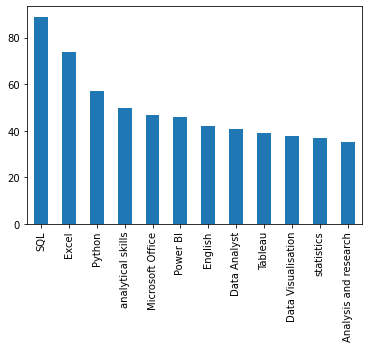

In [347]:
#top-12 skills of candidates
da_skills.skills.value_counts().head(12).plot.bar()